In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("corona.csv")
inc_por = [100*(cont - data["Numero de contagiados"][i-1])/data["Numero de contagiados"][i-1]
            for i, cont in enumerate(data["Numero de contagiados"]) if i > 0]
data["Incremento Porcentual"] = [None] + inc_por
data.set_index('Dia')
data.to_csv("corona.csv")
len(data)

23

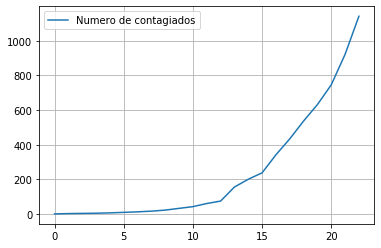

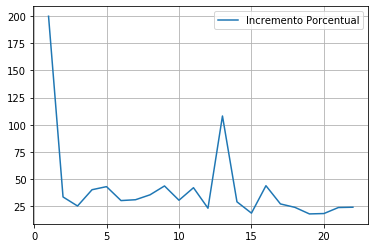

In [2]:
data["Numero de contagiados"].plot()
plt.grid()
plt.legend()
plt.show()
data["Incremento Porcentual"].plot()
plt.grid()
plt.legend()
plt.show()

# Modelo optimista

Suponemos que el numero de infectados (I) crece con una funcion logistica, osea crece exponencialmnte hasta que se "estanca" por que ya no hay aumento en el numero de contagiados
$$
\frac{d I}{dt} = rI(1 - \frac{I}{I_{max}}) \Rightarrow I(t) = \frac{I_{max}}{1+ \frac{I_{max}-I_0}{I_0}e^{-rt}}
$$

$I_{max}$ es la cantidad final de contagiados, $I_0$ es la poblacion incial de contagiados.

$r$ lo esitmamos como el promedio de crecimiento en los ultimos dias (pues parece estar estable 🤞)


In [3]:
r = np.mean(data["Incremento Porcentual"][-3:])
# r = np.mean(data["Incremento Porcentual"])
r 

21.830546449241933

## Contagiados totales

Primero estudiaremos como creceran los casos de contagiados. Asumiendo que el 70% de los chilenos se contagia ($I_{max}$= 12 millones). Esta alcanza un 70% del valor maximo en $t = \ln\left(\frac{1 - 0.7}{0.7\frac{I_{max}-I_0}{I_0}}\right)/r = 63$ dias. Osea en 63 dias se tendria registro de aproximadamente 8.3 millones de casos (considerando todos los casos incluidos los que ya se recuperaron y estan bien).

In [4]:
I_t_max = 12e6
I_t = data["Numero de contagiados"]
I_0 = 0.2*I_t[0]
u = (I_t_max - I_0)/I_0
t_max = np.log(0.7*u/(1-0.7))/(r/100)
t_max - len(data)

62.92159159881339

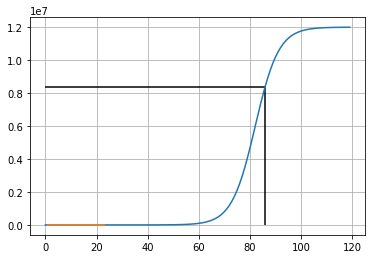

In [5]:
t = np.arange(0, 120)
modelo = I_t_max/(1 + u*np.exp(-r*t/100))
plt.plot(t, modelo)
t_ = np.arange(1, len(data)+1)
plt.plot(t_, I_t)
plt.hlines(I_t_max*0.7, 0, t_max)
plt.vlines(t_max, 0, I_t_max*0.7)
plt.grid()
plt.show()

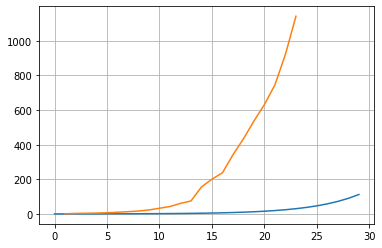

In [6]:
plt.plot(t[:30], modelo[:30])
plt.plot(t_[:30], I_t[:30])
plt.grid()
plt.show()

## Capacidad hospitalaria

Sabemos que aproximadamente un 20% de los casos requieren hospitalizacion, por lo tanto, es importante calcular estimar cuando esta se podria sobrepasar la capacidad hospitalaria. Si suponemos que la cantidad de camas en el pais son 40 mil (numero generoso), tendremos un 70% de las camas ocupadas en 44 dias mas.

In [7]:
I_h_max = 40000
I_h = 0.2*data["Numero de contagiados"]
I_0 = 0.2*I_h[0]
u = (I_h_max - I_0)/I_0
t_max = np.log(0.7*u/(1-0.7))/(r/100)
t_max - len(data)

44.1664699390067

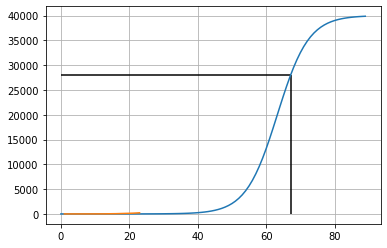

In [9]:
t = np.arange(0, 90)
modelo = I_h_max/(1 + u*np.exp(-r*t/100))
plt.plot(t, modelo)
t_ = np.arange(1, len(data)+1)
plt.plot(t_, I_h)
plt.hlines(I_h_max*0.7, 0, t_max)
plt.vlines(t_max, 0, I_h_max*0.7)
plt.grid()
plt.show()

# ¡Estos modelos son de juqute!

Esta prediciones son _muuuy_ aproximadas, de hecho si usamos un $r\approx 40\%$ (el promdio en los primeros dias) La capacidad hospitalaria alcanza un 90% en menos de 15 dias.

Las autoridades sanitarias usan modelos mas sofisticados y certeros.